In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras import backend as K
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D
from keras.models import Sequential, load_model
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [7]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
config.log_device_placement = True
sess = tf.compat.v1.Session(config=config)
K.set_session(sess)

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5



In [8]:
# Get the data
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="/content/drive/MyDrive/Colab Notebooks/MLClassifier/dataset/train", target_size=(224, 224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="/content/drive/MyDrive/Colab Notebooks/MLClassifier/dataset/test", target_size=(224,224))

Found 323 images belonging to 10 classes.
Found 133 images belonging to 10 classes.


In [9]:
# Generate the model
model = Sequential()
# Layer 1: Convolutional
model.add(Conv2D(input_shape=(224, 224, 3),
                 filters=64,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu'))
# Layer 2: Convolutional
model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 padding='same',
                 activation='relu'))
# Layer 3: MaxPooling
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

In [10]:
# Layer 4: Convolutional
model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 padding='same',
                 activation='relu'))
# Layer 5: Convolutional
model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 padding='same',
                 activation='relu'))
# Layer 6: MaxPooling
model.add(MaxPool2D(pool_size=(2, 2),
                    strides=(2, 2)))

In [11]:
# Layer 7: Convolutional
model.add(Conv2D(filters=256,
                 kernel_size=(3,3),
                 padding='same',
                 activation='relu'))
# Layer 8: Convolutional
model.add(Conv2D(filters=256,
                 kernel_size=(3,3),
                 padding='same',
                 activation='relu'))
# Layer 9: Convolutional
model.add(Conv2D(filters=256,
                 kernel_size=(3,3),
                 padding='same',
                 activation='relu'))
# Layer 10: MaxPooling
model.add(MaxPool2D(pool_size=(2, 2),
                    strides=(2, 2)))

In [12]:
# Layer 11: Convolutional
model.add(Conv2D(filters=512,
                 kernel_size=(3,3),
                 padding='same',
                 activation='relu'))
# Layer 12: Convolutional
model.add(Conv2D(filters=512,
                 kernel_size=(3,3),
                 padding='same',
                 activation='relu'))
# Layer 13: Convolutional
model.add(Conv2D(filters=512,
                 kernel_size=(3,3),
                 padding='same',
                 activation='relu'))
# Layer 14: MaxPooling
model.add(MaxPool2D(pool_size=(2, 2),
                    strides=(2, 2)))

In [13]:
# Layer 15: Convolutional
model.add(Conv2D(filters=512,
                 kernel_size=(3,3),
                 padding='same',
                 activation='relu'))
# Layer 16: Convolutional
model.add(Conv2D(filters=512,
                 kernel_size=(3,3),
                 padding='same',
                 activation='relu'))
# Layer 17: Convolutional
model.add(Conv2D(filters=512,
                 kernel_size=(3,3),
                 padding='same',
                 activation='relu'))
# Layer 18: MaxPooling
model.add(MaxPool2D(pool_size=(2, 2),
                    strides=(2, 2)))

In [14]:
# Layer 19: Flatten
model.add(Flatten())
# Layer 20: Fully Connected Layer
model.add(Dense(units=4096, activation='relu'))
# Layer 21: Fully Connected Layer
model.add(Dense(units=4096, activation='relu'))
# Layer 22: Softmax Layer
model.add(Dense(units=10, activation='softmax'))

In [15]:
# Add Optimizer and check accuracy metrics
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])
# Check model summary
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 conv2d_3 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                  

In [16]:
checkpoint = ModelCheckpoint("vgg16.h5",
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             save_weights_only=False,
                             mode='auto',
                             save_freq=1)


earlystop = EarlyStopping(monitor='val_accuracy',
                          min_delta=0,
                          patience=20,
                          verbose=1,
                          mode='auto')

hist = model.fit(steps_per_epoch=10,
                 x=traindata,
                 validation_data=testdata,
                 validation_steps=2,
                 epochs=30,
                 callbacks=[checkpoint, earlystop])


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


 1/10 [==>...........................] - ETA: 2:09 - loss: 2.3786 - accuracy: 0.0312

 2/10 [=====>........................] - ETA: 3s - loss: 2420.4006 - accuracy: 0.1562

 3/10 [========>.....................] - ETA: 2s - loss: 1614.6300 - accuracy: 0.1250

 4/10 [===========>..................] - ETA: 2s - loss: 1211.5581 - accuracy: 0.1406

 5/10 [==============>...............] - ETA: 4s - loss: 1183.8658 - accuracy: 0.1450

 6/10 [=================>............] - ETA: 3s - loss: 951.8998 - accuracy: 0.1411 

 7/10 [====================>.........] - ETA: 2s - loss: 796.0726 - accuracy: 0.1436

 8/10 [=======================>......] - ETA: 1s - loss: 684.1687 - accuracy: 0.1454

 9/10 [==========================>...] - ETA: 0s - loss: 599.9207 - accuracy: 0.1506

10/10 [==============================] - 21s 771ms/step - loss: 534.2029 - accuracy: 0.1478 - val_loss: 2.2754 - val_accuracy: 0.1250
Epoch 2/30


 1/10 [==>...........................] - ETA: 0s - loss: 2.2621 - accuracy: 0.0000e+00

 2/10 [=====>........................] - ETA: 3s - loss: 2.4362 - accuracy: 0.0857    

 3/10 [========>.....................] - ETA: 2s - loss: 2.3692 - accuracy: 0.1045

 4/10 [===========>..................] - ETA: 2s - loss: 2.3390 - accuracy: 0.1111

 5/10 [==============>...............] - ETA: 2s - loss: 2.3190 - accuracy: 0.1069

 6/10 [=================>............] - ETA: 1s - loss: 2.3135 - accuracy: 0.1166

 7/10 [====================>.........] - ETA: 1s - loss: 2.3300 - accuracy: 0.1128

 8/10 [=======================>......] - ETA: 0s - loss: 2.3185 - accuracy: 0.1278

 9/10 [==========================>...] - ETA: 0s - loss: 2.3140 - accuracy: 0.1197

10/10 [==============================] - 5s 584ms/step - loss: 2.3095 - accuracy: 0.1168 - val_loss: 2.2193 - val_accuracy: 0.1562
Epoch 3/30


 1/10 [==>...........................] - ETA: 5s - loss: 2.2208 - accuracy: 0.1562

 2/10 [=====>........................] - ETA: 4s - loss: 2.3483 - accuracy: 0.1406

 3/10 [========>.....................] - ETA: 3s - loss: 2.3137 - accuracy: 0.1771

 4/10 [===========>..................] - ETA: 2s - loss: 2.3042 - accuracy: 0.1797

 5/10 [==============>...............] - ETA: 2s - loss: 2.2995 - accuracy: 0.1688

 6/10 [=================>............] - ETA: 1s - loss: 2.2995 - accuracy: 0.1719

 7/10 [====================>.........] - ETA: 1s - loss: 2.9128 - accuracy: 0.1518

 8/10 [=======================>......] - ETA: 0s - loss: 2.8332 - accuracy: 0.1602

 9/10 [==========================>...] - ETA: 0s - loss: 2.7699 - accuracy: 0.1771

10/10 [==============================] - 6s 587ms/step - loss: 2.7205 - accuracy: 0.1688 - val_loss: 2.2788 - val_accuracy: 0.1719
Epoch 4/30


 1/10 [==>...........................] - ETA: 5s - loss: 2.2855 - accuracy: 0.1250

 2/10 [=====>........................] - ETA: 3s - loss: 2.2474 - accuracy: 0.1562

 3/10 [========>.....................] - ETA: 2s - loss: 2.2821 - accuracy: 0.1458

 4/10 [===========>..................] - ETA: 2s - loss: 2.2822 - accuracy: 0.1484

 5/10 [==============>...............] - ETA: 2s - loss: 2.2810 - accuracy: 0.1312

 6/10 [=================>............] - ETA: 1s - loss: 2.2797 - accuracy: 0.1146

 7/10 [====================>.........] - ETA: 1s - loss: 2.2820 - accuracy: 0.1128

 8/10 [=======================>......] - ETA: 0s - loss: 2.2706 - accuracy: 0.1322

 9/10 [==========================>...] - ETA: 0s - loss: 2.2701 - accuracy: 0.1313

10/10 [==============================] - 6s 620ms/step - loss: 2.2709 - accuracy: 0.1271 - val_loss: 2.2673 - val_accuracy: 0.1094
Epoch 5/30


 1/10 [==>...........................] - ETA: 5s - loss: 2.2312 - accuracy: 0.1875

 2/10 [=====>........................] - ETA: 3s - loss: 2.2360 - accuracy: 0.2031

 3/10 [========>.....................] - ETA: 2s - loss: 2.2371 - accuracy: 0.1667

 4/10 [===========>..................] - ETA: 2s - loss: 2.2420 - accuracy: 0.1562

 5/10 [==============>...............] - ETA: 2s - loss: 2.2634 - accuracy: 0.1500

 6/10 [=================>............] - ETA: 1s - loss: 2.2508 - accuracy: 0.1562

 7/10 [====================>.........] - ETA: 1s - loss: 2.2511 - accuracy: 0.1518

 8/10 [=======================>......] - ETA: 1s - loss: 2.2436 - accuracy: 0.1602

 9/10 [==========================>...] - ETA: 0s - loss: 2.2460 - accuracy: 0.1583

10/10 [==============================] - 6s 639ms/step - loss: 2.2429 - accuracy: 0.1581 - val_loss: 2.2665 - val_accuracy: 0.1094
Epoch 6/30


 1/10 [==>...........................] - ETA: 5s - loss: 2.3157 - accuracy: 0.0625

 2/10 [=====>........................] - ETA: 3s - loss: 2.2684 - accuracy: 0.0781

 3/10 [========>.....................] - ETA: 1s - loss: 2.2722 - accuracy: 0.0746

 4/10 [===========>..................] - ETA: 2s - loss: 2.2550 - accuracy: 0.1010

 5/10 [==============>...............] - ETA: 1s - loss: 2.2637 - accuracy: 0.0916

 6/10 [=================>............] - ETA: 1s - loss: 2.2525 - accuracy: 0.0982

 7/10 [====================>.........] - ETA: 1s - loss: 2.2552 - accuracy: 0.1026

 8/10 [=======================>......] - ETA: 0s - loss: 2.2455 - accuracy: 0.1145

 9/10 [==========================>...] - ETA: 0s - loss: 2.2421 - accuracy: 0.1120

10/10 [==============================] - 5s 494ms/step - loss: 2.2363 - accuracy: 0.1237 - val_loss: 2.2237 - val_accuracy: 0.2188
Epoch 7/30


 1/10 [==>...........................] - ETA: 4s - loss: 2.2613 - accuracy: 0.1250

 2/10 [=====>........................] - ETA: 3s - loss: 2.2217 - accuracy: 0.1094

 3/10 [========>.....................] - ETA: 2s - loss: 2.2329 - accuracy: 0.1042

 4/10 [===========>..................] - ETA: 2s - loss: 2.2081 - accuracy: 0.1172

 5/10 [==============>...............] - ETA: 2s - loss: 2.2103 - accuracy: 0.1250

 6/10 [=================>............] - ETA: 1s - loss: 2.2177 - accuracy: 0.1354

 7/10 [====================>.........] - ETA: 1s - loss: 2.2098 - accuracy: 0.1473

 8/10 [=======================>......] - ETA: 0s - loss: 2.2138 - accuracy: 0.1484

 9/10 [==========================>...] - ETA: 0s - loss: 2.2129 - accuracy: 0.1528

10/10 [==============================] - 5s 518ms/step - loss: 2.2265 - accuracy: 0.1500 - val_loss: 2.2186 - val_accuracy: 0.1094
Epoch 8/30


 1/10 [==>...........................] - ETA: 4s - loss: 2.2145 - accuracy: 0.1875

 2/10 [=====>........................] - ETA: 3s - loss: 2.2696 - accuracy: 0.1406

 3/10 [========>.....................] - ETA: 2s - loss: 2.2778 - accuracy: 0.1458

 4/10 [===========>..................] - ETA: 2s - loss: 2.2607 - accuracy: 0.1328

 5/10 [==============>...............] - ETA: 2s - loss: 2.2417 - accuracy: 0.1437

 6/10 [=================>............] - ETA: 1s - loss: 2.2628 - accuracy: 0.1411

 7/10 [====================>.........] - ETA: 1s - loss: 2.2477 - accuracy: 0.1641

 8/10 [=======================>......] - ETA: 0s - loss: 2.2429 - accuracy: 0.1586

 9/10 [==========================>...] - ETA: 0s - loss: 2.2484 - accuracy: 0.1506

10/10 [==============================] - 6s 571ms/step - loss: 2.2473 - accuracy: 0.1409 - val_loss: 2.2683 - val_accuracy: 0.1094
Epoch 9/30


 1/10 [==>...........................] - ETA: 8s - loss: 2.2545 - accuracy: 0.0938

 2/10 [=====>........................] - ETA: 3s - loss: 2.2394 - accuracy: 0.1562

 3/10 [========>.....................] - ETA: 2s - loss: 2.2428 - accuracy: 0.1562

 4/10 [===========>..................] - ETA: 2s - loss: 2.2432 - accuracy: 0.1641

 5/10 [==============>...............] - ETA: 2s - loss: 2.2407 - accuracy: 0.1625

 6/10 [=================>............] - ETA: 1s - loss: 2.2467 - accuracy: 0.1562

 7/10 [====================>.........] - ETA: 1s - loss: 2.2475 - accuracy: 0.1473

 8/10 [=======================>......] - ETA: 0s - loss: 2.2430 - accuracy: 0.1523

 9/10 [==========================>...] - ETA: 0s - loss: 2.2505 - accuracy: 0.1493

10/10 [==============================] - 6s 527ms/step - loss: 2.2533 - accuracy: 0.1478 - val_loss: 2.2632 - val_accuracy: 0.1250
Epoch 10/30


 1/10 [==>...........................] - ETA: 5s - loss: 2.2337 - accuracy: 0.1875

 2/10 [=====>........................] - ETA: 0s - loss: 2.2440 - accuracy: 0.1714

 3/10 [========>.....................] - ETA: 1s - loss: 2.2468 - accuracy: 0.1642

 4/10 [===========>..................] - ETA: 1s - loss: 2.2465 - accuracy: 0.1616

 5/10 [==============>...............] - ETA: 1s - loss: 2.2471 - accuracy: 0.1756

 6/10 [=================>............] - ETA: 1s - loss: 2.2523 - accuracy: 0.1779

 7/10 [====================>.........] - ETA: 1s - loss: 2.2554 - accuracy: 0.1744

 8/10 [=======================>......] - ETA: 0s - loss: 2.2542 - accuracy: 0.1718

 9/10 [==========================>...] - ETA: 0s - loss: 2.2585 - accuracy: 0.1660

10/10 [==============================] - 6s 573ms/step - loss: 2.2552 - accuracy: 0.1649 - val_loss: 2.2502 - val_accuracy: 0.1250
Epoch 11/30


 1/10 [==>...........................] - ETA: 6s - loss: 2.2431 - accuracy: 0.1875

 2/10 [=====>........................] - ETA: 3s - loss: 2.2538 - accuracy: 0.1562

 3/10 [========>.....................] - ETA: 2s - loss: 2.2526 - accuracy: 0.1562

 4/10 [===========>..................] - ETA: 2s - loss: 2.2428 - accuracy: 0.1641

 5/10 [==============>...............] - ETA: 2s - loss: 2.2405 - accuracy: 0.1625

 6/10 [=================>............] - ETA: 1s - loss: 2.2515 - accuracy: 0.1615

 7/10 [====================>.........] - ETA: 1s - loss: 2.2487 - accuracy: 0.1473

 8/10 [=======================>......] - ETA: 0s - loss: 2.2499 - accuracy: 0.1406

 9/10 [==========================>...] - ETA: 0s - loss: 2.2458 - accuracy: 0.1562

10/10 [==============================] - 6s 600ms/step - loss: 2.2440 - accuracy: 0.1469 - val_loss: 2.2252 - val_accuracy: 0.1875
Epoch 12/30


 1/10 [==>...........................] - ETA: 4s - loss: 2.2211 - accuracy: 0.0625

 2/10 [=====>........................] - ETA: 3s - loss: 2.2076 - accuracy: 0.1406

 3/10 [========>.....................] - ETA: 2s - loss: 2.2379 - accuracy: 0.1250

 4/10 [===========>..................] - ETA: 2s - loss: 2.2120 - accuracy: 0.1641

 5/10 [==============>...............] - ETA: 2s - loss: 2.2246 - accuracy: 0.1500

 6/10 [=================>............] - ETA: 1s - loss: 2.2076 - accuracy: 0.1562

 7/10 [====================>.........] - ETA: 1s - loss: 2.2166 - accuracy: 0.1652

 8/10 [=======================>......] - ETA: 0s - loss: 2.2193 - accuracy: 0.1641

 9/10 [==========================>...] - ETA: 0s - loss: 2.2095 - accuracy: 0.1632

10/10 [==============================] - 6s 615ms/step - loss: 2.2245 - accuracy: 0.1531 - val_loss: 2.2713 - val_accuracy: 0.1719
Epoch 13/30


 1/10 [==>...........................] - ETA: 5s - loss: 2.2778 - accuracy: 0.1562

 2/10 [=====>........................] - ETA: 3s - loss: 2.2849 - accuracy: 0.1094

 3/10 [========>.....................] - ETA: 2s - loss: 2.2694 - accuracy: 0.1042

 4/10 [===========>..................] - ETA: 2s - loss: 2.2504 - accuracy: 0.1094

 5/10 [==============>...............] - ETA: 2s - loss: 2.2248 - accuracy: 0.1250

 6/10 [=================>............] - ETA: 1s - loss: 2.2342 - accuracy: 0.1250

 7/10 [====================>.........] - ETA: 1s - loss: 2.2480 - accuracy: 0.1295

 8/10 [=======================>......] - ETA: 0s - loss: 2.2325 - accuracy: 0.1367

 9/10 [==========================>...] - ETA: 0s - loss: 2.2224 - accuracy: 0.1458

10/10 [==============================] - 5s 501ms/step - loss: 2.2205 - accuracy: 0.1478 - val_loss: 2.1879 - val_accuracy: 0.1406
Epoch 14/30


 1/10 [==>...........................] - ETA: 5s - loss: 2.2639 - accuracy: 0.1562

 2/10 [=====>........................] - ETA: 3s - loss: 2.2083 - accuracy: 0.1250

 3/10 [========>.....................] - ETA: 2s - loss: 2.2050 - accuracy: 0.1458

 4/10 [===========>..................] - ETA: 2s - loss: 2.2208 - accuracy: 0.1250

 5/10 [==============>...............] - ETA: 2s - loss: 2.2320 - accuracy: 0.1375

 6/10 [=================>............] - ETA: 1s - loss: 2.2321 - accuracy: 0.1510

 7/10 [====================>.........] - ETA: 1s - loss: 2.2265 - accuracy: 0.1518

 8/10 [=======================>......] - ETA: 0s - loss: 2.2221 - accuracy: 0.1523

 9/10 [==========================>...] - ETA: 0s - loss: 2.2155 - accuracy: 0.1458

10/10 [==============================] - 6s 587ms/step - loss: 2.2207 - accuracy: 0.1500 - val_loss: 2.1770 - val_accuracy: 0.1719
Epoch 15/30


 1/10 [==>...........................] - ETA: 5s - loss: 2.2728 - accuracy: 0.0625

 2/10 [=====>........................] - ETA: 3s - loss: 2.2104 - accuracy: 0.0781

 3/10 [========>.....................] - ETA: 3s - loss: 2.1949 - accuracy: 0.1354

 4/10 [===========>..................] - ETA: 2s - loss: 2.1761 - accuracy: 0.1562

 5/10 [==============>...............] - ETA: 1s - loss: 2.1796 - accuracy: 0.1527

 6/10 [=================>............] - ETA: 1s - loss: 2.1922 - accuracy: 0.1472

 7/10 [====================>.........] - ETA: 1s - loss: 2.2026 - accuracy: 0.1385

 8/10 [=======================>......] - ETA: 0s - loss: 2.2007 - accuracy: 0.1498

 9/10 [==========================>...] - ETA: 0s - loss: 2.2111 - accuracy: 0.1467

10/10 [==============================] - 5s 504ms/step - loss: 2.2154 - accuracy: 0.1512 - val_loss: 2.2556 - val_accuracy: 0.1406
Epoch 16/30


 1/10 [==>...........................] - ETA: 5s - loss: 2.1505 - accuracy: 0.1875

 2/10 [=====>........................] - ETA: 3s - loss: 2.1806 - accuracy: 0.2031

 3/10 [========>.....................] - ETA: 2s - loss: 2.1757 - accuracy: 0.1875

 4/10 [===========>..................] - ETA: 1s - loss: 2.1942 - accuracy: 0.1818

 5/10 [==============>...............] - ETA: 1s - loss: 2.2187 - accuracy: 0.1527

 6/10 [=================>............] - ETA: 1s - loss: 2.2164 - accuracy: 0.1534

 7/10 [====================>.........] - ETA: 1s - loss: 2.2094 - accuracy: 0.1538

 8/10 [=======================>......] - ETA: 0s - loss: 2.2044 - accuracy: 0.1586

 9/10 [==========================>...] - ETA: 0s - loss: 2.2103 - accuracy: 0.1622

10/10 [==============================] - 5s 495ms/step - loss: 2.2155 - accuracy: 0.1546 - val_loss: 2.2026 - val_accuracy: 0.0938
Epoch 17/30


 1/10 [==>...........................] - ETA: 4s - loss: 2.2500 - accuracy: 0.0625

 2/10 [=====>........................] - ETA: 3s - loss: 2.2443 - accuracy: 0.0781

 3/10 [========>.....................] - ETA: 1s - loss: 2.2373 - accuracy: 0.0896

 4/10 [===========>..................] - ETA: 3s - loss: 2.2411 - accuracy: 0.0909

 5/10 [==============>...............] - ETA: 2s - loss: 2.2266 - accuracy: 0.0992

 6/10 [=================>............] - ETA: 1s - loss: 2.2359 - accuracy: 0.0920

 7/10 [====================>.........] - ETA: 1s - loss: 2.2274 - accuracy: 0.1231

 8/10 [=======================>......] - ETA: 0s - loss: 2.2151 - accuracy: 0.1366

 9/10 [==========================>...] - ETA: 0s - loss: 2.2239 - accuracy: 0.1390

10/10 [==============================] - 5s 549ms/step - loss: 2.2177 - accuracy: 0.1375 - val_loss: 2.2125 - val_accuracy: 0.1094
Epoch 18/30


 1/10 [==>...........................] - ETA: 5s - loss: 2.2610 - accuracy: 0.1562

 2/10 [=====>........................] - ETA: 0s - loss: 2.2863 - accuracy: 0.1714

 3/10 [========>.....................] - ETA: 2s - loss: 2.3150 - accuracy: 0.1343

 4/10 [===========>..................] - ETA: 1s - loss: 2.2719 - accuracy: 0.1212

 5/10 [==============>...............] - ETA: 2s - loss: 2.2449 - accuracy: 0.1450

 6/10 [=================>............] - ETA: 1s - loss: 2.2518 - accuracy: 0.1411

 7/10 [====================>.........] - ETA: 1s - loss: 2.2427 - accuracy: 0.1590

 8/10 [=======================>......] - ETA: 0s - loss: 2.2408 - accuracy: 0.1542

 9/10 [==========================>...] - ETA: 0s - loss: 2.2283 - accuracy: 0.1544

10/10 [==============================] - 5s 492ms/step - loss: 2.2292 - accuracy: 0.1512 - val_loss: 2.2077 - val_accuracy: 0.2188
Epoch 19/30


 1/10 [==>...........................] - ETA: 5s - loss: 2.3160 - accuracy: 0.0000e+00

 2/10 [=====>........................] - ETA: 0s - loss: 2.2997 - accuracy: 0.0000e+00

 3/10 [========>.....................] - ETA: 1s - loss: 2.2537 - accuracy: 0.0896    

 4/10 [===========>..................] - ETA: 1s - loss: 2.2503 - accuracy: 0.1414

 5/10 [==============>...............] - ETA: 1s - loss: 2.2307 - accuracy: 0.1450

 6/10 [=================>............] - ETA: 1s - loss: 2.2138 - accuracy: 0.1718

 7/10 [====================>.........] - ETA: 1s - loss: 2.2058 - accuracy: 0.1692

 8/10 [=======================>......] - ETA: 0s - loss: 2.2042 - accuracy: 0.1718

 9/10 [==========================>...] - ETA: 0s - loss: 2.2056 - accuracy: 0.1660

10/10 [==============================] - 6s 606ms/step - loss: 2.2080 - accuracy: 0.1615 - val_loss: 2.2289 - val_accuracy: 0.1094
Epoch 20/30


 1/10 [==>...........................] - ETA: 4s - loss: 2.1059 - accuracy: 0.1562

 2/10 [=====>........................] - ETA: 3s - loss: 2.2392 - accuracy: 0.1406

 3/10 [========>.....................] - ETA: 2s - loss: 2.2194 - accuracy: 0.1562

 4/10 [===========>..................] - ETA: 2s - loss: 2.2075 - accuracy: 0.1484

 5/10 [==============>...............] - ETA: 2s - loss: 2.2251 - accuracy: 0.1312

 6/10 [=================>............] - ETA: 1s - loss: 2.2386 - accuracy: 0.1198

 7/10 [====================>.........] - ETA: 1s - loss: 2.2393 - accuracy: 0.1231

 8/10 [=======================>......] - ETA: 0s - loss: 2.2189 - accuracy: 0.1410

 9/10 [==========================>...] - ETA: 0s - loss: 2.2246 - accuracy: 0.1351

10/10 [==============================] - 5s 518ms/step - loss: 2.2159 - accuracy: 0.1409 - val_loss: 2.2016 - val_accuracy: 0.1719
Epoch 21/30


 1/10 [==>...........................] - ETA: 0s - loss: 1.9348 - accuracy: 0.3333

 2/10 [=====>........................] - ETA: 3s - loss: 2.3604 - accuracy: 0.1143

 3/10 [========>.....................] - ETA: 3s - loss: 2.2970 - accuracy: 0.1194

 4/10 [===========>..................] - ETA: 2s - loss: 2.2561 - accuracy: 0.1212

 5/10 [==============>...............] - ETA: 2s - loss: 2.2758 - accuracy: 0.1145

 6/10 [=================>............] - ETA: 1s - loss: 2.2465 - accuracy: 0.1166

 7/10 [====================>.........] - ETA: 1s - loss: 2.2281 - accuracy: 0.1282

 8/10 [=======================>......] - ETA: 0s - loss: 2.2167 - accuracy: 0.1410

 9/10 [==========================>...] - ETA: 0s - loss: 2.2177 - accuracy: 0.1313

10/10 [==============================] - 5s 539ms/step - loss: 2.2229 - accuracy: 0.1375 - val_loss: 2.2109 - val_accuracy: 0.1875
Epoch 22/30


 1/10 [==>...........................] - ETA: 5s - loss: 2.3202 - accuracy: 0.1250

 2/10 [=====>........................] - ETA: 3s - loss: 2.3052 - accuracy: 0.1406

 3/10 [========>.....................] - ETA: 1s - loss: 2.2879 - accuracy: 0.1493

 4/10 [===========>..................] - ETA: 1s - loss: 2.2776 - accuracy: 0.1616

 5/10 [==============>...............] - ETA: 1s - loss: 2.2849 - accuracy: 0.1527

 6/10 [=================>............] - ETA: 1s - loss: 2.2750 - accuracy: 0.1656

 7/10 [====================>.........] - ETA: 1s - loss: 2.2522 - accuracy: 0.1795

 8/10 [=======================>......] - ETA: 0s - loss: 2.2470 - accuracy: 0.1718

 9/10 [==========================>...] - ETA: 0s - loss: 2.2411 - accuracy: 0.1815

10/10 [==============================] - 5s 527ms/step - loss: 2.2249 - accuracy: 0.1753 - val_loss: 2.1917 - val_accuracy: 0.1562
Epoch 23/30


 1/10 [==>...........................] - ETA: 5s - loss: 2.1705 - accuracy: 0.0938

 2/10 [=====>........................] - ETA: 3s - loss: 2.2272 - accuracy: 0.0938

 3/10 [========>.....................] - ETA: 2s - loss: 2.2388 - accuracy: 0.0729

 4/10 [===========>..................] - ETA: 2s - loss: 2.2185 - accuracy: 0.1094

 5/10 [==============>...............] - ETA: 1s - loss: 2.2252 - accuracy: 0.1250

 6/10 [=================>............] - ETA: 1s - loss: 2.2374 - accuracy: 0.1406

 7/10 [====================>.........] - ETA: 1s - loss: 2.2378 - accuracy: 0.1518

 8/10 [=======================>......] - ETA: 0s - loss: 2.2375 - accuracy: 0.1542

 9/10 [==========================>...] - ETA: 0s - loss: 2.2164 - accuracy: 0.1544

10/10 [==============================] - 6s 597ms/step - loss: 2.2261 - accuracy: 0.1546 - val_loss: 2.2748 - val_accuracy: 0.1562
Epoch 24/30


 1/10 [==>...........................] - ETA: 0s - loss: 1.8954 - accuracy: 0.3333

 2/10 [=====>........................] - ETA: 4s - loss: 2.1573 - accuracy: 0.1714

 3/10 [========>.....................] - ETA: 4s - loss: 2.1731 - accuracy: 0.1642

 4/10 [===========>..................] - ETA: 3s - loss: 2.2262 - accuracy: 0.1212

 5/10 [==============>...............] - ETA: 2s - loss: 2.2205 - accuracy: 0.1221

 6/10 [=================>............] - ETA: 1s - loss: 2.2053 - accuracy: 0.1288

 7/10 [====================>.........] - ETA: 1s - loss: 2.2084 - accuracy: 0.1385

 8/10 [=======================>......] - ETA: 0s - loss: 2.1940 - accuracy: 0.1542

 9/10 [==========================>...] - ETA: 0s - loss: 2.2085 - accuracy: 0.1506

10/10 [==============================] - 5s 530ms/step - loss: 2.2100 - accuracy: 0.1546 - val_loss: 2.2419 - val_accuracy: 0.1250
Epoch 25/30


 1/10 [==>...........................] - ETA: 5s - loss: 2.2485 - accuracy: 0.1875

 2/10 [=====>........................] - ETA: 3s - loss: 2.1826 - accuracy: 0.2344

 3/10 [========>.....................] - ETA: 2s - loss: 2.1730 - accuracy: 0.2188

 4/10 [===========>..................] - ETA: 2s - loss: 2.1936 - accuracy: 0.2031

 5/10 [==============>...............] - ETA: 2s - loss: 2.2002 - accuracy: 0.2125

 6/10 [=================>............] - ETA: 1s - loss: 2.1872 - accuracy: 0.1927

 7/10 [====================>.........] - ETA: 1s - loss: 2.1995 - accuracy: 0.1696

 8/10 [=======================>......] - ETA: 0s - loss: 2.1951 - accuracy: 0.1562

 9/10 [==========================>...] - ETA: 0s - loss: 2.1959 - accuracy: 0.1597

10/10 [==============================] - 5s 490ms/step - loss: 2.2010 - accuracy: 0.1581 - val_loss: 2.2046 - val_accuracy: 0.1562
Epoch 26/30


 1/10 [==>...........................] - ETA: 5s - loss: 2.2162 - accuracy: 0.1875

 2/10 [=====>........................] - ETA: 7s - loss: 2.2243 - accuracy: 0.1719

 3/10 [========>.....................] - ETA: 4s - loss: 2.2217 - accuracy: 0.1250

 4/10 [===========>..................] - ETA: 2s - loss: 2.2264 - accuracy: 0.1313

 5/10 [==============>...............] - ETA: 2s - loss: 2.2000 - accuracy: 0.1527

 6/10 [=================>............] - ETA: 2s - loss: 2.1839 - accuracy: 0.1718

 7/10 [====================>.........] - ETA: 1s - loss: 2.1758 - accuracy: 0.1846

 8/10 [=======================>......] - ETA: 0s - loss: 2.1981 - accuracy: 0.1718

 9/10 [==========================>...] - ETA: 0s - loss: 2.2063 - accuracy: 0.1583

10/10 [==============================] - 5s 538ms/step - loss: 2.2120 - accuracy: 0.1546 - val_loss: 2.1840 - val_accuracy: 0.1719
Epoch 26: early stopping


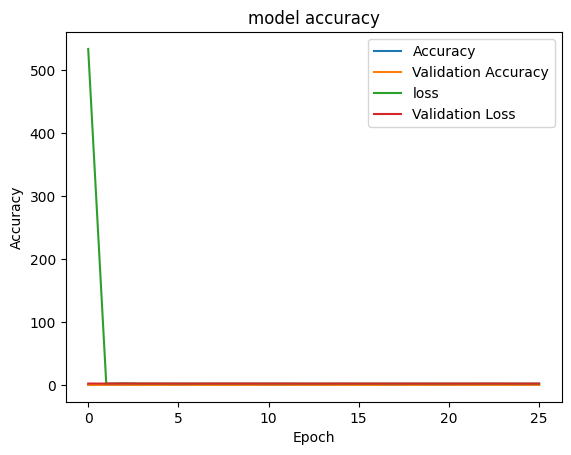

In [17]:
model.save("vgg16.h5")
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show(block=True)

In [18]:
from PIL import Image
# Upload image
image = Image.open("/content/main.jpg")

# Get image width and height values
width, height = image.size

# Number of episodes
num_vertical_divisions = 5
num_horizontal_divisions = 2

# Width and height values of parts
division_width = width // num_horizontal_divisions
division_height = height // num_vertical_divisions

captured_images = []

labels = ['bread', 'cheese','lettuce','meat','meatball',
          'nugget','onion','pickle','schnitzel','tomato']

# Upload the model
saved_model = load_model("/content/vgg16.h5")

# Capture and predict pixels
for i in range(num_horizontal_divisions):
    for j in range(num_vertical_divisions):
        # Set the start and end points of the track
        start_x = i * division_width
        end_x = start_x + division_width
        start_y = j * division_height
        end_y = start_y + division_height

        # Capture part and resize it
        division = image.crop((start_x, start_y, end_x, end_y))
        division = division.resize((224, 224))

        # Guess the track
        prediction = saved_model.predict(np.expand_dims(division, axis=0))
        predicted_label = labels[np.argmax(prediction)]

        # Print the predicted label and part to the screen
        print(f"Segment {i+1}-{j+1}: {predicted_label}")


1/1 [==============================] - 1s 749ms/step
Segment 1-1: meat
1/1 [==============================] - 0s 21ms/step
Segment 1-2: meat
1/1 [==============================] - 0s 20ms/step
Segment 1-3: meat
1/1 [==============================] - 0s 23ms/step
Segment 1-4: meat
1/1 [==============================] - 0s 24ms/step
Segment 1-5: meat
1/1 [==============================] - 0s 20ms/step
Segment 2-1: meat
1/1 [==============================] - 0s 21ms/step
Segment 2-2: meat
1/1 [==============================] - 0s 20ms/step
Segment 2-3: meat
1/1 [==============================] - 0s 20ms/step
Segment 2-4: meat
1/1 [==============================] - 0s 23ms/step
Segment 2-5: meat


In [19]:
loss, accuracy = model.evaluate(traindata, verbose=1)
print("Train : accuracy = %f  ;  loss = %f" % (accuracy, loss))

loss_v, accuracy_v = model.evaluate(testdata, verbose=1)
print("Validation : accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))

11/11 [==============================] - 3s 237ms/step - loss: 2.2187 - accuracy: 0.1517
Train : accuracy = 0.151703  ;  loss = 2.218657
5/5 [==============================] - 2s 460ms/step - loss: 2.2221 - accuracy: 0.1429
Validation : accuracy = 0.142857  ;  loss_v = 2.222127
